# Trabalho Prático I
###### Aluno: Breno de Sousa Matos
###### Matrícula: 2017086007

In [35]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

Iniciando Conexão

In [3]:
conn = sqlite3.connect('tp1.bd')
cursor = conn.cursor()

Lendo os dados necessários

In [4]:
with open("despesas_publicas_tp1.sql", "r", encoding = "latin-1") as f:
    sql = f.read()
    
cursor.executescript(sql)



OperationalError: table [ORGAO] already exists

## 1. Comandos SQL

Meu número de matrícula é $\textbf{2017086007}$. Logo, devo realizar as consultas:
  
 1,9,7,2,3 e 8


### 1.1 Consulta 1 

In [13]:
# Liste todos os códigos e nomes de subfunções da função que possui o maior número de subfuncoes.

query = '''select sf.cod_subfuncao, sf.nome_subfuncao 
from detalhamento_funcao df 
inner join subfuncao sf on sf.cod_subfuncao = df.cod_subfuncao 
where df.cod_funcao = (
  select f.cod_funcao from funcao f 
  inner join detalhamento_funcao df on df.cod_funcao = f.cod_funcao 
  group by f.cod_funcao order by count(*) desc 
  limit 1
);
'''
df = pd.read_sql_query(query,conn)
df

,COD_SUBFUNCAO,NOME_SUBFUNCAO
0,125,Normatização e fiscalização
1,126,Tecnologia da informação
2,131,Comunicação social
3,244,Assistência comunitária
4,306,Alimentação e nutrição
5,365,Educação infantil
6,511,Saneamento básico rural


### 1.2 Consulta 9

In [17]:
# Liste todas as despesas públicas (código da despesa, mês e ano da despesa, modalidade, valor) 
# em que o órgão responsável é aquele que possui o maior número de órgãos subordinados.

query = '''select dp.cod_despesa, dp.mes_despesa, dp.ano_despesa, dp.modalidade_despesa, dp.valor_despesa 
from despesa_publica dp 
where dp.cod_orgao = (
  select o.cod_orgao 
  from orgao o 
  order by o.qtd_orgaos_subordinados desc 
  limit 1
);

'''

df = pd.read_sql_query(query,conn)
df

,COD_DESPESA,MES_DESPESA,ANO_DESPESA,MODALIDADE_DESPESA,VALOR_DESPESA
0,196,10,2018,Reserva de Contingência,0.0
1,197,1,2018,Reserva de Contingência,0.0
2,198,2,2018,Reserva de Contingência,0.0
3,199,3,2018,Reserva de Contingência,0.0
4,200,4,2018,Reserva de Contingência,0.0
5,201,5,2018,Reserva de Contingência,0.0
6,202,6,2018,Reserva de Contingência,0.0
7,203,7,2018,Reserva de Contingência,0.0
8,204,9,2018,Reserva de Contingência,0.0
9,205,10,2018,Reserva de Contingência,0.0


### 1.3 Consulta 7

In [21]:
# Liste os órgãos governamentais e a quantidade de programas de governo distintos envolvidos 
# nas despesas públicas desses órgãos.
# Nesta consulta, desconsidere valores de despesa negativos ou iguais a zero no perı́odo.
query = '''
select o.nome_orgao, (
  select distinct count(pg.nome_programa_governo) 
  from despesa_publica dp 
  inner join programa_governo pg on dp.cod_programa_governo = pg.cod_programa_governo 
  where dp.cod_orgao = o.cod_orgao and dp.valor_despesa > 0
) as "QTD_PROGRAMA_GOVERNO" 
from orgao o where QTD_PROGRAMA_GOVERNO > 0 
order by qtd_programa_governo desc;
'''
df = pd.read_sql_query(query,conn)
df


,NOME_ORGAO,QTD_PROGRAMA_GOVERNO
0,Ministério da Educação,10
1,"Ministério da Agricultura, Pecuária e Abastec",4
2,Ministério da Saúde,3
3,Ministério da Defesa,2
4,Ministério do Desenvolvimento Social,2



### 1.4 Consulta 2

In [25]:
# Liste o valor total de despesas públicas por função (nome) e subfunção (nome), apenas
# nos casos em que esse valor total excedeu 200 mil reais.
query = '''select f.nome_funcao, sf.nome_subfuncao, sum(dp.valor_despesa) 
from detalhamento_funcao df 
    inner join funcao f on f.cod_funcao = df.cod_funcao 
    inner join subfuncao sf on sf.cod_subfuncao = df.cod_subfuncao 
    inner join despesa_publica dp on dp.cod_detalhamento = df.cod_detalhamento 
    group by f.nome_funcao, sf.nome_subfuncao 
    having sum(dp.valor_despesa) > 200000;
'''

df = pd.read_sql_query(query,conn)
df

,NOME_FUNCAO,NOME_SUBFUNCAO,sum(dp.valor_despesa)
0,Assistência social,Assistência comunitária,227883.77
1,Educação,Educação básica,334262.06


### 1.5 Consulta 3

In [28]:
# Liste todos os nomes dos órgãos e o valor das despesas totais no ano de 2018 para os
# mesmos, ordenando de forma decrescente pelo valor.
query = ''' select o.nome_orgao, sum(dp.valor_despesa)
from orgao o
inner join despesa_publica dp on dp.cod_orgao = o.cod_orgao
where dp.ano_despesa = 2018
group by o.nome_orgao order by sum(dp.valor_despesa) desc;
'''
df = pd.read_sql_query(query,conn)
df

,NOME_ORGAO,sum(dp.valor_despesa)
0,Ministério da Defesa,353376.70
1,Ministério do Desenvolvimento Social,278586.35
2,"Ministério da Agricultura, Pecuária e Abastec",90836.51
3,Ministério da Educação,64007.82
4,Ministério da Saúde,50971.19
5,"Ministério da Ciência, Tecnologia, Inovações",0.00
6,Ministério da Fazenda,0.00
7,Ministério da Integração Nacional,0.00
8,Ministério da Justiça e Segurança Pública,0.00
9,Ministério das Relações Exteriores,0.00


### 1.6 Consulta 8

In [73]:
# Liste os nomes das subfunções das despesas públicas envolvidas para cada programa de
# governo. Sua consulta deve retornar o nome do programa de governo, a subfunção da
# despesa, a quantidade de entradas de despesas públicas e o valor total dessas despesas.
query = '''select pg.nome_programa_governo, sf.nome_subfuncao, count(dp.valor_despesa) as "QUANTIDADE", sum(dp.valor_despesa) as "VALOR_TOTAL" 
from programa_governo pg 
    inner join despesa_publica dp on dp.cod_programa_governo = pg.cod_programa_governo 
    inner join detalhamento_funcao df on df.cod_detalhamento = dp.cod_detalhamento 
    inner join subfuncao sf on sf.cod_subfuncao = df.cod_subfuncao 
    group by pg.nome_programa_governo, sf.nome_subfuncao 
    order by pg.nome_programa_governo asc, count(dp.valor_despesa) desc, sum(dp.valor_despesa) desc;
'''
df = pd.read_sql_query(query,conn)
df


,NOME_PROGRAMA_GOVERNO,NOME_SUBFUNCAO,QUANTIDADE,VALOR_TOTAL
0,BRASIL SEM MISERIA,Assistência comunitária,117,227883.77
1,BRASIL SEM MISERIA,Alimentação e nutrição,112,100373.55
2,BRASIL SEM MISERIA,Recursos hídricos,34,0.00
3,BRASIL SEM MISERIA,Saneamento básico rural,27,0.00
4,BRASIL SEM MISERIA,Tecnologia da informação,26,58918.28
5,BRASIL SEM MISERIA,Promoção comercial,18,0.00
6,BRASIL SEM MISERIA,Extensão rural,17,0.00
7,BRASIL SEM MISERIA,Difusão do conhecimento científico e tecnológico,13,0.00
8,BRASIL SEM MISERIA,Outros encargos especiais,12,0.00
9,BRASIL SEM MISERIA,Educação infantil,2,0.00


Visualização

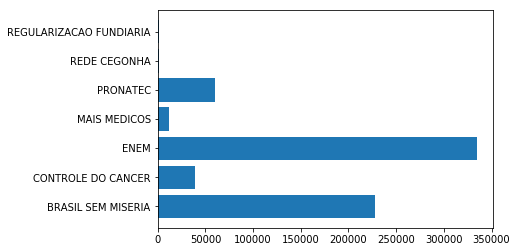

In [87]:
# selecionando apenas os programas de valor total > 0
df1 = df
df1 = df1[df1["VALOR_TOTAL"]>0]
df1
# Agora, plotamos um grafico de barras para visualizar os dados

plt.barh(df1["NOME_PROGRAMA_GOVERNO"],df1["VALOR_TOTAL"])
plt.show()

## 2 Tradução de Comandos da Álgebra Relacional

Como, na álgebra relacional, são eliminadas duplicatas, todos os comandos de seleção utilizam distinct

### 2.1 Consulta 12

In [64]:
query = '''select distinct NOME_FUNCAO, NOME_SUBFUNCAO from 
            (FUNCAO natural join 
            (DETALHAMENTO_FUNCAO natural join SUBFUNCAO))''' 
df = pd.read_sql_query(query,conn)
df

,NOME_FUNCAO,NOME_SUBFUNCAO
0,Essencial à justiça,Comunicação social
1,Defesa nacional,Administração geral
2,Defesa nacional,Defesa terrestre
3,Segurança pública,Administração geral
4,Segurança pública,Policiamento
5,Segurança pública,Defesa civil
6,Segurança pública,Informação e inteligência
7,Assistência social,Normatização e fiscalização
8,Assistência social,Tecnologia da informação
9,Assistência social,Comunicação social


### 2.2 Consulta 13

In [90]:
# nao entendi se era pra selecionar apenas as linhas unicas
query = '''select distinct MODALIDADE_DESPESA,VALOR_DESPESA,NOME_PROGRAMA_GOVERNO from 
        PROGRAMA_GOVERNO natural join 
        (select * from DESPESA_PUBLICA where MODALIDADE_DESPESA ="Reserva de Contingência")'''
df = pd.read_sql_query(query,conn)
df


,MODALIDADE_DESPESA,VALOR_DESPESA,NOME_PROGRAMA_GOVERNO
0,Reserva de Contingência,0.00,BRASIL SEM MISERIA
1,Reserva de Contingência,0.00,VIOLENCIA NO TRANSITO
2,Reserva de Contingência,0.00,TERRITORIOS DA CIDADANIA
3,Reserva de Contingência,8215.70,BRASIL SEM MISERIA
4,Reserva de Contingência,3.42,BRASIL SEM MISERIA
5,Reserva de Contingência,81120.13,BRASIL SEM MISERIA
6,Reserva de Contingência,0.00,REGULARIZACAO FUNDIARIA
7,Reserva de Contingência,1497.26,REGULARIZACAO FUNDIARIA
8,Reserva de Contingência,0.00,SEGURO RURAL PRIVADO
9,Reserva de Contingência,0.00,VIVER SEM LIMITE


Visualização

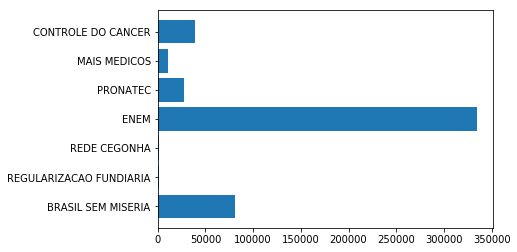

In [92]:
# Primeiramente, selecionameos apenas os programas com despesas > 0

df1 = df[["VALOR_DESPESA","NOME_PROGRAMA_GOVERNO"]]
df1 = df1[df1["VALOR_DESPESA"]>0]
# Agora, plotamos um grafico de barras para visualizar os dados
plt.barh(df1["NOME_PROGRAMA_GOVERNO"],df1["VALOR_DESPESA"])
plt.show()


### 2.3 Consulta 14

In [5]:
query = '''select distinct VALOR_DESPESA,NOME_ORGAO from 
            DESPESA_PUBLICA natural join
            (select * from ORGAO where NOME_ORGAO="Ministério da Fazenda")'''

# query = 'select VALOR_DESPESA,NOME_ORGAO from (DESPESA_PUBLICA natural join (select NOME_ORGAO from ORGAO where NOME_ORGAO="Ministério da Fazenda"))'
df = pd.read_sql_query(query,conn)
df

,VALOR_DESPESA,NOME_ORGAO
0,0,Ministério da Fazenda


### 2.4 Consulta 15

In [4]:
query = '''select distinct NOME_PROGRAMA_GOVERNO,VALOR_DESPESA from 
            ((DESPESA_PUBLICA natural join 
            (select * from ORGAO where NOME_ORGAO ="Ministério da Saúde")) natural join
            PROGRAMA_GOVERNO)'''
df = pd.read_sql_query(query,conn)
df

,NOME_PROGRAMA_GOVERNO,VALOR_DESPESA
0,VIVER SEM LIMITE,0.00
1,SOS EMERGENCIA,0.00
2,MELHOR EM CASA,0.00
3,UBS,0.00
4,"UPA (INVESTIMENTO, CUSTEIO E COMPLEXO DE REGUL...",0.00
5,REDE CEGONHA,0.00
6,CONTROLE DO CANCER,0.00
7,CONTROLE DO CANCER,38971.19
8,"CRACK, E POSSIVEL VENCER",0.00
9,BRASIL SEM MISERIA,0.00


In [ ]:
conn.close()